## keras构建分类模型(对数据进行归一化)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.14.5
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_all[:5000], X_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(X_valid.shape, y_valid.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
print(np.max(X_train), np.min(X_train))

255 0


In [7]:
# 数据归一化,标准归一化 x = (x - u) / std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 对于训练集使用fit_transform，该函数会在归一化结束后保存训练集中的均值方差，并使用这两个参数进行验证集和测试集的归一化
# 归一化之前将数据转为浮点型，防止精度损失
# 还有该函数接收的数据类型为二维数组，所以这里先reshape
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
X_test = scaler.transform(X_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
print(np.max(X_train_scaled), np.min(X_train_scaled))

2.0231433 -0.8105136


In [9]:
# 构建模型
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [10]:
log_his = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.9150 - accuracy: 0.7013 - val_loss: 0.6198 - val_accuracy: 0.7924
Epoch 2/10
55000/55000 [==============================] - 4s 67us/sample - loss: 0.5841 - accuracy: 0.7971 - val_loss: 0.5205 - val_accuracy: 0.8230
Epoch 3/10
55000/55000 [==============================] - 4s 72us/sample - loss: 0.5147 - accuracy: 0.8194 - val_loss: 0.4758 - val_accuracy: 0.8362
Epoch 4/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4775 - accuracy: 0.8342 - val_loss: 0.4490 - val_accuracy: 0.8464
Epoch 5/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4524 - accuracy: 0.8429 - val_loss: 0.4302 - val_accuracy: 0.8534
Epoch 6/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4345 - accuracy: 0.8491 - val_loss: 0.4199 - val_accuracy: 0.8572
Epoch 7/10
55000/55000 [==============================] -

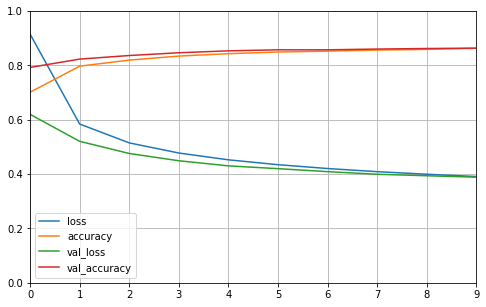

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(log_his)

In [12]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.4294 - accuracy: 0.8459


[0.42939227635860444, 0.8459]